Step one is to get data. In this article we do not start from the raw data import, rather from the normalized counts corrected for sequencing depth and transcriptome composition bias(CPM).

After importing data we get a dataframe of CPM in the following format:

In [6]:
#install.packages("openxlsx")
library(openxlsx, quietly = TRUE)

In [8]:
 # DATA IMPORT
 path = file.path("/Users/kseniatroshchenkova/Desktop/entropy plot/counts.xlsx")
 df_vis <- read.xlsx(path, sep="\t", rowNames = TRUE)
 head(df_vis)

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,Sample_11,Sample_12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Transcript_1,6357.8646,4016763.1,6454.7928,80147.4493,870.25979,23193.80,7799.574,15020.17,6812.822,69314.7590,1321.99091,8284.310
Transcript_2,3835.4029,1859292.5,2666.3053,11395.9343,80.57961,526747.94,38728.339,452865.71,47060.160,8335.0225,231.07971,44355.886
Transcript_3,7820.8923,2442099.5,10649.5105,3276.7618,924.65103,12602.48,8415.192,13282.80,10461.174,1881.2012,1300.49512,10885.971
Transcript_4,99537.5974,1135615.5,101435.1844,816.8936,36.26082,27966.46,1814.342,34953.47,2265.442,790.7726,42.99157,1911.868
Transcript_5,662.1462,1038030.2,728.2963,12000.7572,74.53614,91836.59,4768.678,221401.37,12679.877,18046.6674,142.40959,9665.254
Transcript_6,2308.0524,553663.8,2421.6695,22031.6293,30.21735,509517.31,27301.130,372171.34,35730.200,21155.9095,91.35710,35220.198


In [9]:
#install.packages("dplyr")
library("dplyr")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




The next step is to get the frequency of each transcript in each sample. To do so, we may simply divide the transcript count by the total amount of transcripts in the sample.

In [10]:
#dat2 <- df_vis %>%
#  mutate_if(is.numeric, funs(./sum(.)))

df_vis_freq <- apply(df_vis,2,function(x){x/sum(x)})

In [11]:
head(df_vis_freq)

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,Sample_11,Sample_12
Transcript_1,0.0094430634,0.28203939,0.0079454757,0.127040875,0.0084525230,0.006202904,0.008777759,0.004296577,0.008127361,0.0757425516,0.0064324656,0.007675788
Transcript_2,0.0056965594,0.13055132,0.0032820671,0.018063575,0.0007826410,0.140872406,0.043585461,0.129543972,0.056140454,0.0091079574,0.0011243741,0.041097735
Transcript_3,0.0116160358,0.17147346,0.0131089298,0.005193960,0.0089808057,0.003370381,0.009470584,0.003799595,0.012479665,0.0020556513,0.0063278727,0.010086345
Transcript_4,0.1478389228,0.07973792,0.1248608299,0.001294849,0.0003521885,0.007479295,0.002041888,0.009998575,0.002702561,0.0008641036,0.0002091859,0.001771432
Transcript_5,0.0009834573,0.07288591,0.0008964906,0.019022273,0.0007239429,0.024560594,0.005366743,0.063332712,0.015126469,0.0197201961,0.0006929282,0.008955295
Transcript_6,0.0034280512,0.03887583,0.0029809347,0.034922103,0.0002934904,0.136264281,0.030725106,0.106461039,0.042624370,0.0231177687,0.0004445200,0.032633106


Next, we will calculate the entropy for each sample according to the previously mentioned formulae. Note, that entropy here does not lie in the range from 0 to 1. 

In [12]:

#  install.packages("plyr")
library(plyr)


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [13]:
total_entropy <- -colSums(apply(df_vis_freq,2,function(x){x*log(x)}), na.rm = TRUE)


df_total_entropy <- setNames(ldply (total_entropy, data.frame) , c("sample", "df_total_entropy") )
df_total_entropy


sample,df_total_entropy
<chr>,<dbl>
Sample_1,3.856459
Sample_2,2.543267
Sample_3,3.874378
Sample_4,3.380122
Sample_5,2.460311
Sample_6,3.345274
Sample_7,3.890770
Sample_8,3.412859
Sample_9,4.128542


In [14]:
#install.packages("reshape2")
library("reshape2")

In [15]:
head(df_vis_freq)

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,Sample_11,Sample_12
Transcript_1,0.0094430634,0.28203939,0.0079454757,0.127040875,0.0084525230,0.006202904,0.008777759,0.004296577,0.008127361,0.0757425516,0.0064324656,0.007675788
Transcript_2,0.0056965594,0.13055132,0.0032820671,0.018063575,0.0007826410,0.140872406,0.043585461,0.129543972,0.056140454,0.0091079574,0.0011243741,0.041097735
Transcript_3,0.0116160358,0.17147346,0.0131089298,0.005193960,0.0089808057,0.003370381,0.009470584,0.003799595,0.012479665,0.0020556513,0.0063278727,0.010086345
Transcript_4,0.1478389228,0.07973792,0.1248608299,0.001294849,0.0003521885,0.007479295,0.002041888,0.009998575,0.002702561,0.0008641036,0.0002091859,0.001771432
Transcript_5,0.0009834573,0.07288591,0.0008964906,0.019022273,0.0007239429,0.024560594,0.005366743,0.063332712,0.015126469,0.0197201961,0.0006929282,0.008955295
Transcript_6,0.0034280512,0.03887583,0.0029809347,0.034922103,0.0002934904,0.136264281,0.030725106,0.106461039,0.042624370,0.0231177687,0.0004445200,0.032633106


In [16]:
df_ent_melt <- setNames(melt(as.matrix(df_vis_freq), na.rm = FALSE), c("Transcript", "Sample", "Value"))
df_ent_melt <- transform(df_ent_melt, Transcript = as.factor(Transcript), Sample = as.factor(Sample), Value = as.numeric(Value))

In [17]:
df_ent_melt

Transcript,Sample,Value
<fct>,<fct>,<dbl>
Transcript_1,Sample_1,9.443063e-03
Transcript_2,Sample_1,5.696559e-03
Transcript_3,Sample_1,1.161604e-02
Transcript_4,Sample_1,1.478389e-01
Transcript_5,Sample_1,9.834573e-04
Transcript_6,Sample_1,3.428051e-03
Transcript_7,Sample_1,2.583589e-02
Transcript_8,Sample_1,2.997203e-05
Transcript_9,Sample_1,2.828611e-04


In [18]:
df_total_entropy

sample,df_total_entropy
<chr>,<dbl>
Sample_1,3.856459
Sample_2,2.543267
Sample_3,3.874378
Sample_4,3.380122
Sample_5,2.460311
Sample_6,3.345274
Sample_7,3.890770
Sample_8,3.412859
Sample_9,4.128542


In [19]:
#install.packages("ggplot2")
library("ggplot2")
#install.packages("forcats")
library("forcats")

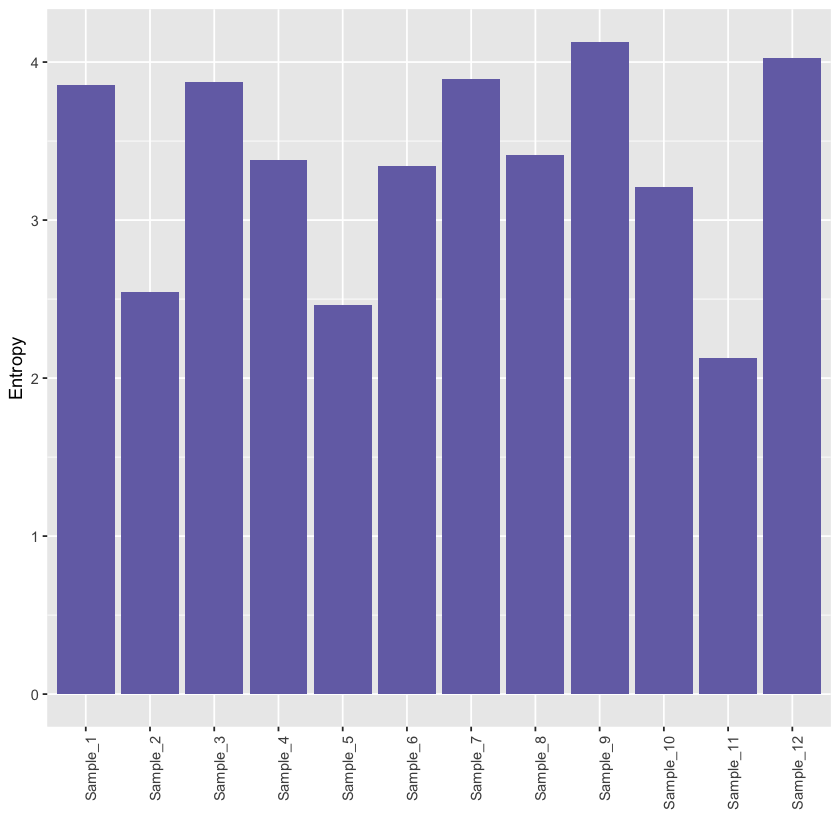

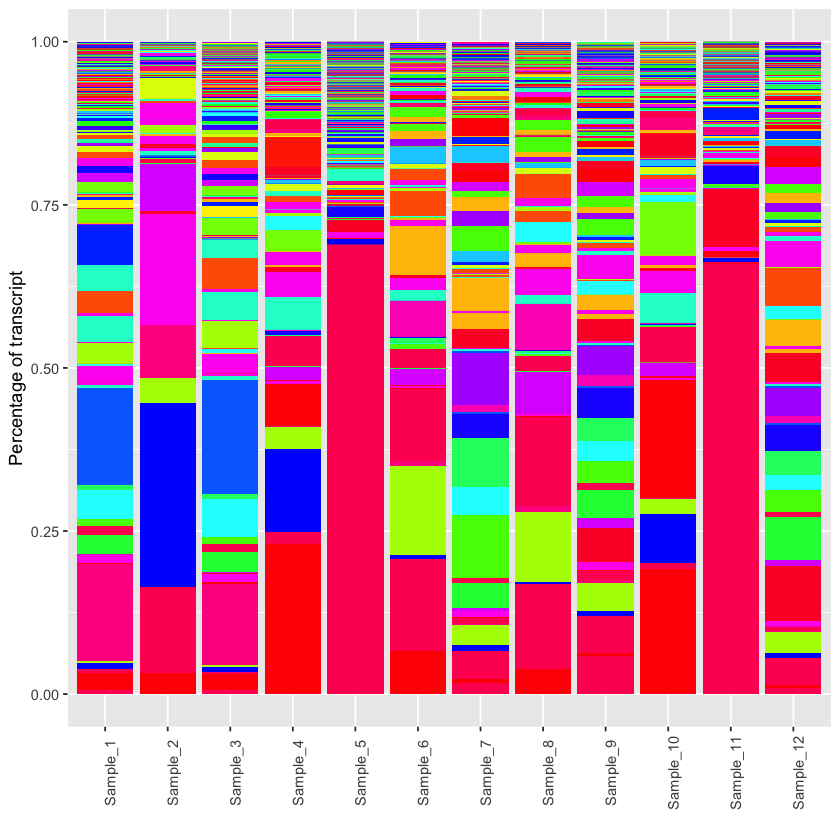

In [20]:
#pdf(paste("Entropy.pdf",sep=""))
par(mfrow = c(1,2))

# Top entropy plot
# relevel factor to display in the correct order
ggplot(data=df_total_entropy, aes(x=forcats::fct_relevel(sample, c(paste0("Sample_", seq(1, ncol(df_vis), 1)))), y=df_total_entropy)) + 
        geom_bar(stat="identity", fill = "#7570B3") +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
        labs(y="Entropy", x = "") +
        theme(legend.position = "none")


# Create color pallete from rainbow pallette. Repeating same colors for 400 times, so there will be enough color values for the given amount of transcripts. 
# There is no need to create non repeating colors, since the human eye will not be able to distinguish those.
values=rep(rainbow(32),times=400)
values<-sample(values)

# Reorder the transcripts by their percentage. We are reordering the long dataframe, so the transcripts will go from the one with the highest values 
# among all transcripts among all samples to the smallest values among all transcripts among all samples.
# No legend since this is a visualization to see the patterns and dive deeper. We do not  aim to find which transcipts are overrepresented in this visualization, 
# just to find whether there are any we should pay attention to.
ggplot(df_ent_melt, aes(fill=reorder(Transcript, Value), y = Value, x = Sample)) +
        geom_bar(position = "fill", stat = "identity")  + 
        theme(legend.position = "none") +
        scale_fill_manual(values=values) +
        theme(axis.text.x = element_text(angle = 90)) +
        labs(y="Percentage of transcript", x = "")

#dev.off()